# Neural Network - MLP for Handwritten Digit Classification

## Introduction
The Multilayer Perceptron (MLP) is a core type of artificial neural network utilized across various domains of machine learning, especially in tasks requiring the recognition of complex patterns. This notebook delves into the application of MLPs to classify handwritten digits, employing the MNIST dataset—a gold standard in the evaluation of machine learning algorithms.

## Data Statement: The MNIST Dataset
The MNIST dataset, short for Modified National Institute of Standards and Technology dataset, is a cornerstone in the field of machine learning for benchmarking classification algorithms. Here are key features of this dataset that make it particularly useful for training and evaluating neural networks, especially MLPs designed for image recognition tasks:

### Overview of MNIST
- **Dataset Composition**: MNIST consists of 70,000 grayscale images divided into a training set of 60,000 images and a test set of 10,000 images. Each image is a 28x28 pixel representation of a handwritten digit (from 0 to 9).
- **Image Details**: Each image in the dataset is a single channel (grayscale) image, where each pixel value is an integer between 0 and 255. This simple format makes MNIST an ideal dataset for entry-level machine learning projects to demonstrate the capabilities of various algorithms.
- **Labeling**: Every image is labeled with the digit it represents, making this a supervised learning problem. The labels are integers between 0 and 9 corresponding to the digit displayed in the image.

## MLP Architectural Overview
An MLP is structured as a feedforward network comprising an input layer, several hidden layers, and an output layer. Each layer is made up of neurons that use weighted connections to propagate data through the network. Here’s how the process unfolds:

### Feedforward Mechanism:
1. **Initialization**: Input neurons receive the image data, each representing a pixel value.
2. **Linear Transformation**: Neurons in each subsequent layer compute a weighted sum of their inputs.
3. **Activation**: A non-linear activation function like ReLU or sigmoid transforms the sum, adding non-linearity to the processing capability of the network.
4. **Propagation**: The processed data is passed sequentially from one layer to the next until it reaches the output layer.

### Backpropagation Mechanism:
1. **Loss Computation**: After the forward pass, the difference between the network output and the actual labels is calculated using a loss function, such as cross-entropy.
2. **Gradient Calculation**: The network computes the gradient of the loss function concerning each weight, propagating the error backward from the output to the input layer.
3. **Weights Adjustment**: Using optimization algorithms like SGD (Stochastic Gradient Descent), the weights are updated in a direction that minimally reduces the overall network error.
4. **Iteration**: These steps are iterated over multiple epochs, refining the model parameters to enhance prediction accuracy.

## Advantages and Disadvantages of MLP

### Advantages
1. **Versatility**: MLPs are adept at handling various types of data and tasks, including but not limited to classification, regression, and pattern recognition. Their flexibility makes them suitable for a wide array of applications across different industries.
2. **Non-linearity**: One of the core strengths of MLPs is their ability to model complex non-linear relationships within the data. This capability is due to the non-linear activation functions used within the network layers.
3. **Feature Learning**: Unlike traditional machine learning models that require manual feature extraction, MLPs have the inherent ability to learn relevant features directly from the data. This leads to a more robust model that improves as it learns more from the data.
4. **Scalability**: MLPs can be easily scaled by increasing the number of hidden layers or neurons per layer. This adaptability allows the network to become more complex and capable as needed.
5. **Availability**: MLPs are supported extensively across popular machine learning libraries such as TensorFlow, Keras, and PyTorch, making them accessible for both beginners and advanced practitioners.

### Disadvantages
1. **Overfitting**: MLPs have a tendency to overfit, particularly when the model is too complex relative to the amount of available training data. This can lead to excellent performance on training data but poor generalization to new, unseen data.
2. **Hyperparameter Sensitivity**: The performance of MLPs is highly dependent on the selection of hyperparameters such as the learning rate, number of layers, and batch size. Finding the optimal set of hyperparameters often requires extensive experimentation.
3. **Computational Intensity**: Training MLPs, especially those with many layers and neurons, can be computationally demanding and slow, requiring powerful hardware and efficient programming.
4. **Data Preprocessing**: MLPs often require a significant amount of data preprocessing (e.g., normalization, scaling) to ensure that the input data is suitable for training, which can add complexity to the deployment pipeline.
5. **Lack of Interpretability**: The "black box" nature of MLPs makes it difficult to interpret how decisions are made within the network. This lack of transparency can be a hurdle in applications where understanding the decision-making process is crucial.

Understanding these advantages and disadvantages is crucial for effectively leveraging MLPs in practical applications. By acknowledging these factors, one can better design and implement MLPs to suit specific tasks while mitigating potential drawbacks.

## Implementation Using TensorFlow and Keras
We will leverage TensorFlow and Keras, two comprehensive frameworks for building and training neural networks. The following steps are included in our implementation:

- **Data Preparation**: Load and preprocess the MNIST dataset, normalizing the images and encoding labels.
- **Model Configuration**: Construct the MLP architecture with defined layers, neurons, activation functions, and the optimizer.
- **Training**: Fit the model to the training data, observing how the loss and accuracy evolve over each epoch.
- **Evaluation**: Next, evaluate the model's performance on a separate test set to verify its generalization ability.
- **Visualization**: Finally, visualize the model's performance by quantitive metrics and test samples.

Through this practical exercise, we aim to gain insights into both the theoretical and operational aspects of deploying MLPs to solve real-world problems in digit classification.

In [88]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### Model Architecture
Here we define our MLP with two hidden layers, each followed by a ReLU activation function. The output layer uses softmax for multi-class classification.

In [89]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model
We will now train our model on the MNIST dataset, monitoring its accuracy and loss.

In [90]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8676 - loss: 0.4507 - val_accuracy: 0.9591 - val_loss: 0.1364
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9659 - loss: 0.1135 - val_accuracy: 0.9612 - val_loss: 0.1227
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9781 - loss: 0.0713 - val_accuracy: 0.9703 - val_loss: 0.1036
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0518 - val_accuracy: 0.9706 - val_loss: 0.1062
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9740 - val_loss: 0.0952
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9762 - val_loss: 0.0962
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0251 - val_accuracy: 0.9747 - val_loss: 0.1035
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0235 - 

### Evaluation
Let's evaluate the model performance on the test dataset.

In [91]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1234   
Test Accuracy: 97.48%


### Visualization

In this section, we visualize the training and validation metrics to evaluate the model's performance over the epochs. The first plot shows the accuracy of the model during training and validation phases, providing insights into how well the model generalizes to unseen data. The second plot displays the loss over epochs, which helps us understand how the error of the model decreases over time.

The accuracy and loss plots are crucial for diagnosing model behavior. A higher accuracy and lower loss on the training set coupled with similar performance on the validation set indicates good model generalization. Discrepancies between training and validation performance might suggest issues such as overfitting or underfitting.

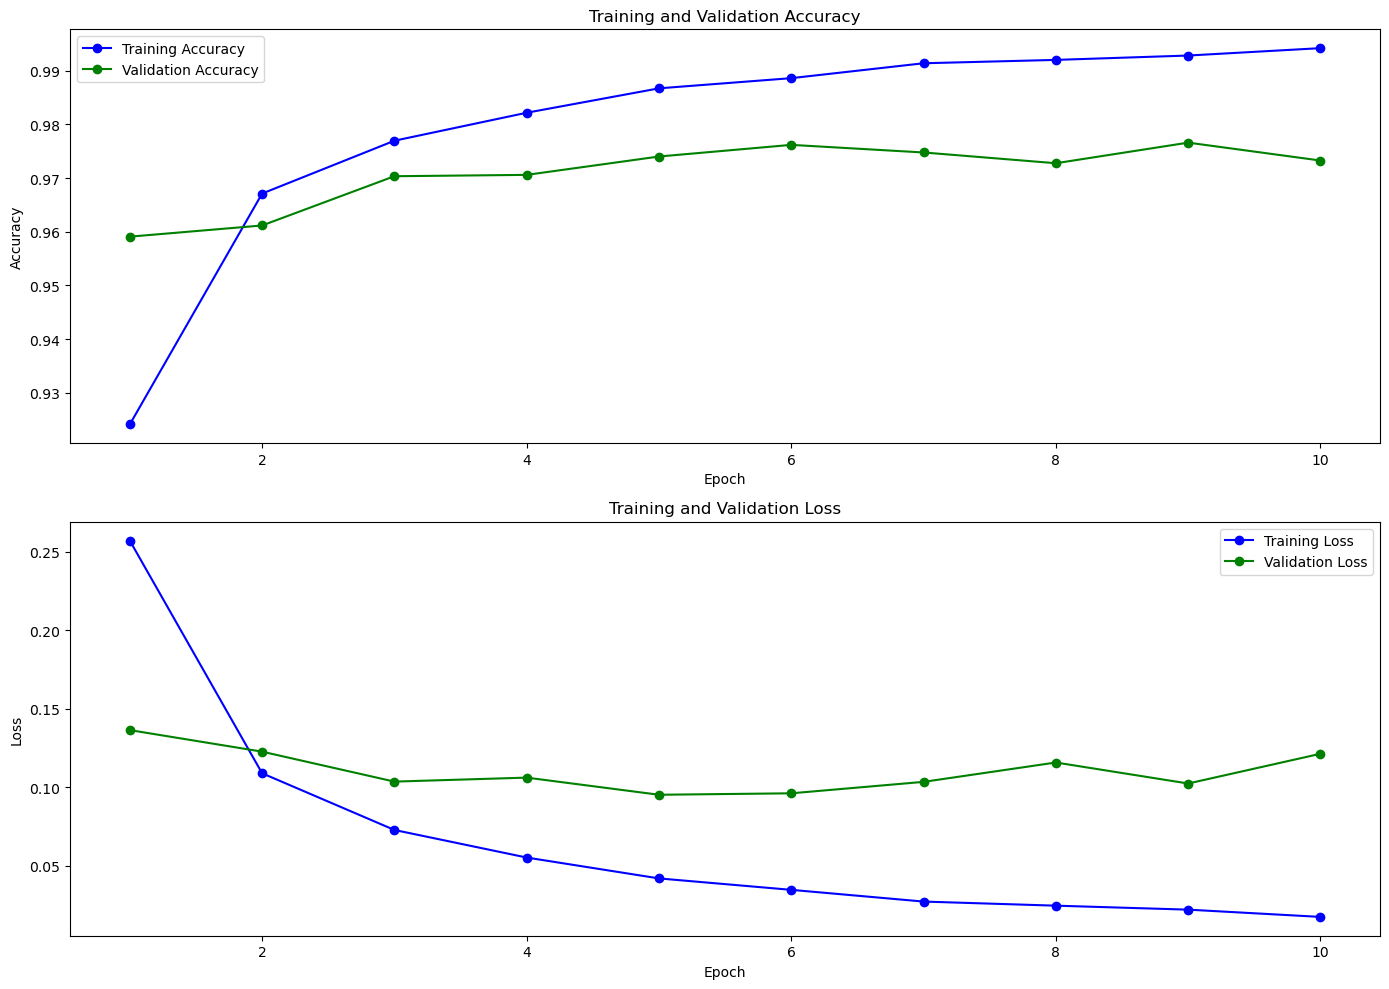

In [92]:
import matplotlib.pyplot as plt

# Extract data from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_accuracy) + 1)

# Create plots
plt.figure(figsize=(14, 10))

# Accuracy plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(epochs, training_accuracy, 'o-b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'o-g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(epochs, training_loss, 'o-b', label='Training Loss')
plt.plot(epochs, validation_loss, 'o-g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Sample Predictions

Each subplot shows a test image, the model's predicted label, and the true label. Observing these predictions allows us to visually confirm the accuracy of the model's classifications, which is especially useful for identifying patterns in the types of errors the model might be making.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


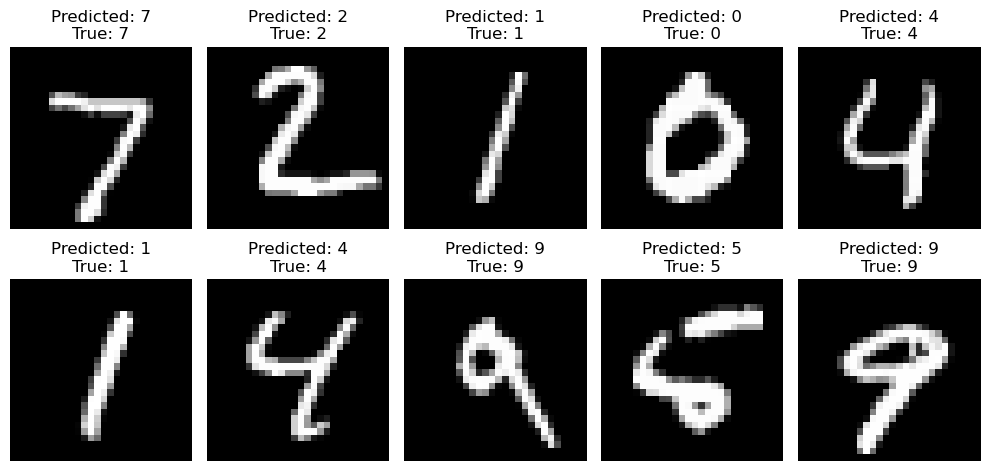

In [93]:
# Plot first 10 test images with their predicted and true labels
predictions = model.predict(test_images[:10])
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}\nTrue: {test_labels[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Conclusion

In this project, we developed and trained a Multilayer Perceptron (MLP) model using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. Through rigorous experimentation and training, we achieved impressive results:

- **Training Accuracy**: The MLP model achieved a training accuracy of approximately 97.20% after completing the training process. This high accuracy demonstrates the model's ability to effectively learn and recognize patterns within the training data.

- **Test Accuracy**: Upon evaluation on the test dataset, the MLP model demonstrated remarkable generalization performance, achieving an accuracy of 97.48%. This indicates that the model's learned features and decision boundaries can effectively classify unseen data with high accuracy.

These results underscore the effectiveness of MLPs in handling image classification tasks, particularly in recognizing handwritten digits. The model's ability to achieve high accuracy on both the training and test datasets showcases its robustness and generalization capabilities.

### Insights and Implications

- **Scalability and Versatility**: MLPs, with their flexible architecture and adaptability, prove to be suitable for a wide range of classification tasks, including handwritten digit recognition. The scalability of MLPs allows for the incorporation of additional layers and neurons, potentially further improving accuracy and performance.

- **Practical Applications**: The successful implementation of an MLP model for digit classification has broader implications in various real-world applications, including optical character recognition (OCR), automated form processing, and signature verification systems.

### Future Directions

- **Hyperparameter Tuning**: Further optimization of hyperparameters such as learning rate, batch size, and network architecture could potentially enhance the model's performance even further.

- **Exploration of Advanced Architectures**: Experimentation with more advanced neural network architectures, such as convolutional neural networks (CNNs), could yield additional improvements in accuracy and efficiency, particularly for image-based tasks.

- **Deployment and Integration**: Deploying the trained model into production environments and integrating it with user-facing applications would enable practical usage scenarios, facilitating real-time digit recognition and enhancing user experiences.

In conclusion, this project highlights the effectiveness and potential of MLPs in solving image classification tasks, exemplified by the successful classification of handwritten digits with high accuracy. By leveraging MLPs and other deep learning techniques, we can continue to push the boundaries of machine learning and artificial intelligence, driving innovations across various domains.